# CASE STUDY

### BY - KHUSHBU RATHI

In [5]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#pd.plotting.register_matplotlib_converters()
import seaborn as sns 
import geocoder
import geopy
from geopy.geocoders import Nominatim

In [6]:
# read Airbnb data = Revenue data

airbnb = pd.read_csv('listings.csv')

C:\Users\khush\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (43,61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
# examining the dataset

print(airbnb.head())
print(airbnb.shape)

     id                        listing_url       scrape_id last_scraped  \
0  2539  https://www.airbnb.com/rooms/2539  20190708031610   2019-07-09   
1  2595  https://www.airbnb.com/rooms/2595  20190708031610   2019-07-09   
2  3647  https://www.airbnb.com/rooms/3647  20190708031610   2019-07-08   
3  3831  https://www.airbnb.com/rooms/3831  20190708031610   2019-07-09   
4  5022  https://www.airbnb.com/rooms/5022  20190708031610   2019-07-08   

                                               name  \
0                Clean & quiet apt home by the park   
1                             Skylit Midtown Castle   
2               THE VILLAGE OF HARLEM....NEW YORK !   
3                   Cozy Entire Floor of Brownstone   
4  Entire Apt: Spacious Studio/Loft by central park   

                                             summary  \
0           Renovated apt home in elevator building.   
1  Find your romantic getaway to this beautiful, ...   
2                                                N

In [8]:
# dataset summary

airbnb.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.889500e+04,4.889500e+04,0.0,0.0,0.0,4.889500e+04,0.0,48874.000000,48874.000000,48895.000000,...,37852.000000,37817.000000,37840.000000,37813.000000,37815.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000
mean,1.901714e+07,2.019071e+13,NaN,NaN,NaN,6.762001e+07,NaN,14.281745,14.281745,40.728949,...,9.279298,9.746119,9.757135,9.564674,9.399392,7.143982,5.559546,1.473811,0.110625,1.373221
std,1.098311e+07,5.449274e+00,NaN,NaN,NaN,7.861097e+07,NaN,84.151375,84.151375,0.054530,...,1.084514,0.719957,0.724397,0.758343,0.907107,32.952519,32.149232,5.600618,0.986685,1.680442
min,2.539000e+03,2.019071e+13,NaN,NaN,NaN,2.438000e+03,NaN,0.000000,0.000000,40.499790,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.471945e+06,2.019071e+13,NaN,NaN,NaN,7.822033e+06,NaN,1.000000,1.000000,40.690100,...,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.190000
50%,1.967728e+07,2.019071e+13,NaN,NaN,NaN,3.079382e+07,NaN,1.000000,1.000000,40.723070,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.720000
75%,2.915218e+07,2.019071e+13,NaN,NaN,NaN,1.074344e+08,NaN,2.000000,2.000000,40.763115,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,1.000000,0.000000,2.020000
max,3.648724e+07,2.019071e+13,NaN,NaN,NaN,2.743213e+08,NaN,1070.000000,1070.000000,40.913060,...,10.000000,10.000000,10.000000,10.000000,10.000000,327.000000,319.000000,101.000000,23.000000,58.500000


In [9]:
# level counts in the variable CITY

airbnb['city'].value_counts()

New York                                  21934
Brooklyn                                  18978
Queens                                     4328
Bronx                                       773
Brooklyn                                    694
                                          ...  
 New York                                     1
Wadsworth Terrace, Manhattan, New York        1
Williamsburg Brooklyn                         1
Far rockaway                                  1
Astoria/Queens                                1
Name: city, Length: 305, dtype: int64

## DATA WRANGLING

In [10]:
# checking the NA values in all the variables

airbnb.isna().sum()[airbnb.isna().sum() >0]

name                              16
summary                         2041
space                          14026
description                      781
neighborhood_overview          17506
notes                          28704
transit                        17078
access                         21701
interaction                    20064
house_rules                    18876
thumbnail_url                  48895
medium_url                     48895
xl_picture_url                 48895
host_name                         21
host_since                        21
host_location                    164
host_about                     18682
host_response_time             16361
host_response_rate             16361
host_acceptance_rate           48895
host_is_superhost                 21
host_thumbnail_url                21
host_picture_url                  21
host_neighbourhood              6529
host_listings_count               21
host_total_listings_count         21
host_has_profile_pic              21
h

In [11]:
# function for na values

def na_values(var):
    return (airbnb[var].isna().sum())

In [12]:
# function for unique values

def unique_values(var):
    return (list(airbnb[var].unique()))

In [13]:
# function to look for number of unique values

def number_of_unique(n):
    return (airbnb[n].nunique())

### Filter Data as per state & bedroom

In [14]:
# checking the number of unique values in state column

print("Unique values in state:", unique_values('state'))

Unique values in state: ['NY', nan, 'Ny', 'ny', 'MP', 'CA', 'NJ', 'New York ']


Filtering state = New York (NY) from the data

In [15]:
# creating list to filter NY
ny = ['NY', 'Ny', 'ny', 'New York ']
airbnb = airbnb.loc[airbnb['state'].isin(ny)]

# checking for missing values
print("Missing values in state =", na_values('state'))


# checking the state column again for number of unique values
print("State: ", unique_values('state'))

# now we only have data for New York, without missing values 

Missing values in state = 0
State:  ['NY', 'Ny', 'ny', 'New York ']


Filter the data based on bedrooms = 2 as they are more profitable.

In [16]:
# bedroom = 2
airbnb = airbnb[airbnb['bedrooms'] == 2.0]

# check the data
unique_values('bedrooms')

#airbnb.head()

[2.0]

#### Checking the variables for the neighbourhoods for investing

In [17]:
# neighbourhood_cleansed variable

# na values
print("Missing values in neighbourhood_cleansed:", na_values('neighbourhood_cleansed'))

# no.of unique_values
print("\nNumber of unique values in neighbourhood_cleansed:", number_of_unique('neighbourhood_cleansed'))

# checking the unique values in neighbourhood_cleansed column
print("\nUnique values in neighbourhood_cleansed:\n\n", unique_values('neighbourhood_cleansed'))


# AS THIS VARIABLE SHOWS THE VERIFIED LOCATION WE CAN USE THIS INSTEAD OF NEIGHBOURHOOD variable

Missing values in neighbourhood_cleansed: 0

Number of unique values in neighbourhood_cleansed: 181

Unique values in neighbourhood_cleansed:

 ['East Harlem', 'Bedford-Stuyvesant', 'Williamsburg', 'Chelsea', 'Upper East Side', 'Park Slope', 'Harlem', 'Lower East Side', 'Prospect Heights', 'Carroll Gardens', 'East Village', 'Upper West Side', 'South Slope', 'Cobble Hill', 'Gowanus', 'Ridgewood', 'Windsor Terrace', 'Chinatown', 'Little Italy', 'Greenpoint', 'Washington Heights', 'Boerum Hill', 'Brooklyn Heights', 'Fort Greene', 'Nolita', 'Gramercy', 'Bushwick', 'West Village', 'Clinton Hill', 'DUMBO', 'Sunnyside', 'Prospect-Lefferts Gardens', 'Long Island City', 'Crown Heights', 'Astoria', 'Midtown', "Hell's Kitchen", 'Spuyten Duyvil', 'Columbia St', 'Longwood', 'Inwood', 'Civic Center', 'SoHo', 'Allerton', 'Brighton Beach', 'New Springville', 'Concourse', 'Sunset Park', 'Financial District', 'East Flatbush', 'Tribeca', 'Woodside', 'Greenwich Village', 'Downtown Brooklyn', 'Kips Bay', '

In [18]:
# neighbourhood_group_cleansed

# na values
print("Missing values in neighbourhood_group_cleansed = ", na_values('neighbourhood_group_cleansed'))

# unique values
print("\nUnique values in neighbourhood_group_cleansed:\n\n", unique_values('neighbourhood_group_cleansed'))

# no.of unique_values
print("\nNumber of unique values in neighbourhood_group_cleansed:", number_of_unique('neighbourhood_group_cleansed'))


Missing values in neighbourhood_group_cleansed =  0

Unique values in neighbourhood_group_cleansed:

 ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

Number of unique values in neighbourhood_group_cleansed: 5


In [19]:
# Zipcode - the variable in which the client is more interested about.

# na values
print("Missing values in zipcode:", na_values('zipcode'))

# unique values
print("\nUnique values in zipcode:\n\n", unique_values('zipcode'))

# no.of unique_values
print("\nNumber of unique values in zipcode:", number_of_unique('zipcode'))



Missing values in zipcode: 50

Unique values in zipcode:

 ['10029', '11221', '11206', '10001', '10162', '11215', '10075', '11211', '10031', '10002', '11217', '11231', '11233', '10009', '10023', '11201', '11238', '11249', '10027', '10039', '11385', '10013', '10011', '11222', '11216', '10032', '11205', '10003', '10012', '10026', '10025', '10128', '10014', '11104', '10022', '11225', '11101', '10038', '11213', '11106', '10016', '10036', '10463', '10065', '10024', '10455', '10034', '11237', '10469', '11235', '10314', '10452', '11103', '11220', '10004', '11226', '10282', '10019', '11377', '10033', '10021', '11230', '11214', '10037', '10010', '11418', '10030', '10005', '10035', '11218', '11105', '11372', nan, '11207', '10028', '10017', '11208', '10040', '11412', '11367', '11374', '11209', '11693', '10305', '11109', '10304', '11102', '11212', '11232', '11204', '10451', '11369', '11234', '10473', '10301', '10044', '10018', '11236', '11203', '11373', '10475', '11417', '10459', '10007', '11375',

#### Since zipcode has missing values, we can insert them using Latitude and Longitude

In [20]:
# filtering zipcode with max 5 digits as the zipcode doesn't have more than 5 digits

# airbnb['zipcode'] = airbnb['zipcode'].str[:5]

In [21]:
airbnb['zipcode'].isna().sum()

50

In [22]:
airbnb[airbnb['zipcode'].isna() == True]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3013,1762513,https://www.airbnb.com/rooms/1762513,20190708031610,2019-07-08,"2bd/2bth, drmn, 1 block from subway in LIC","My place is close to M. Wells Steakhouse, LIC ...","2bd/2bth, fully equiped, 1 block from grocery,...","My place is close to M. Wells Steakhouse, LIC ...",none,"This evolving Queens, New York, neighborhood s...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN
4440,3038614,https://www.airbnb.com/rooms/3038614,20190708031610,2019-07-08,"Lovely, Huge, Open, Quiet, Spacious, Sunny, A/C",HUGE OPEN SPACE✨Close to all: Walk to PRATT. O...,Master Bedroom with a private bathroom inside ...,HUGE OPEN SPACE✨Close to all: Walk to PRATT. O...,none,My neighborhood is great because you can walk ...,...,f,f,flexible,f,f,1,1,0,0,0.05
4620,3236385,https://www.airbnb.com/rooms/3236385,20190708031610,2019-07-09,Cute and Cozy Two Bedroom in Sunset Park,This gut renovated two bedroom apartment is in...,Our cozy apartment was gut renovated when we m...,This gut renovated two bedroom apartment is in...,none,Sunset Park is a truly unique neighborhood tha...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.09
5598,4069681,https://www.airbnb.com/rooms/4069681,20190708031610,2019-07-08,"""DECO CASA"" 2 Bedroom Greenpoint Brooklyn",Entire private 2 bedroom 1 bath apartment. Thi...,This is a fully private apartment for rent wit...,Entire private 2 bedroom 1 bath apartment. Thi...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,4.27
5685,4137680,https://www.airbnb.com/rooms/4137680,20190708031610,2019-07-09,"LUXURY entire apt, steps to Central Park","Beautiful, clean, spacious 2 bedroom 2 full ba...","Entire apartment available, including roof","Beautiful, clean, spacious 2 bedroom 2 full ba...",none,Fantastic neighborhood - steps away from Centr...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.47
6356,4637014,https://www.airbnb.com/rooms/4637014,20190708031610,2019-07-09,法拉盛中心温馨两房两厅公寓｡近一切｡2 br close to everything,"这个公寓位于法拉盛中心,三楼(有电梯),朝南,光亮｡走路8分钟到七号地铁(直达曼哈顿), ...",Location and function.,"这个公寓位于法拉盛中心,三楼(有电梯),朝南,光亮｡走路8分钟到七号地铁(直达曼哈顿), ...",none,Flushing. 7 train takes you to Manhattan in ha...,...,f,f,moderate,f,f,2,1,1,0,0.46
8225,6336738,https://www.airbnb.com/rooms/6336738,20190708031610,2019-07-09,Bklyn Brownstone 2Bedroom Apartment w/Office S...,Come relax in our sunny spacious apartment in ...,On the 3rd flr 1 Single Private Bedroom w/clos...,Come relax in our sunny spacious apartment in ...,none,The neighborhood is very friendly and family o...,...,f,f,moderate,f,f,1,1,0,0,1.88
11026,8519400,https://www.airbnb.com/rooms/8519400,20190708031610,2019-07-08,2 Bedroom Near Meatpacking,A very conveniently-located walk-up apartment ...,NaN,A very conveniently-located walk-up apartment ...,none,NaN,...,f,f,flexible,f,f,1,1,0,0,NaN
12390,9550714,https://www.airbnb.com/rooms/9550714,20190708031610,2019-07-08,"Brooklyn Charmer, Close to Everything NYC!",My place is walking distance to Brooklyn Bridg...,NaN,My place is walking distance to Brooklyn Bridg...,none,NaN,...,f,f,flexible,f,f,1,1,0,0,0.03
14981,11927032,https://www.airbnb.com/rooms/11927032,20190708031610,2019-07-09,Charming Modern Bed-Stuy Brooklyn Townhouse W/...,"New, thoughtfully decorated 2 bedroom family f...",Expect quality and convenience on your stay. ...,"New, thoughtfully decorated 2 bedroom family f...",none,We are 1/2 block from a park and a few blocks ...,...,t,f,flexible,f,f,1,1,0,0,NaN


In [23]:
# na values for latitude and longitude

print("Missing values in latitude = ", na_values('latitude'))

print("Missing values in longitude = ", na_values('longitude'))

Missing values in latitude =  0
Missing values in longitude =  0


In [24]:
def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.raw['address']['postcode']


geolocator = geopy.Nominatim(user_agent='myGeocoder')


zip_na = airbnb[airbnb['zipcode'].isna() == True]
zip_na.shape

(50, 106)

In [25]:
# getting missing zipcodes through geopy & geocoder

zipcodes = zip_na.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='latitude', lon_field='longitude')
zipcodes

3013     11101
4440     11238
4620     11220
5598     11222
5685     10023
6356     11355
8225     11233
11026    10011
12390    11201
14981    11233
16781    11211
16887    11215
17065    11102
17164    11237
17304    10003
17862    11206
18513    11233
19108    11206
20318    11211
20809    10034
21831    10038
21907    10002
22416    11105
22521    10025
22678    10005
22736    10009
24646    10029
25342    10019
26066    10018
28061    10013
28115    11369
29074    10002
29544    10011
29576    10013
30682    10003
31093    10017
31879    10032
31981    10009
32149    10129
34714    10023
35436    11211
35649    10007
36260    10460
36453    11226
36557    10036
36615    11205
36966    10024
37568    11220
38174    11238
48027    11237
dtype: object

In [26]:
pd.Series(zipcodes)
airbnb['zipcode'].fillna(zipcodes,inplace = True)

In [27]:
# since half of the values are string and float therefore we are converting float into string
# removing zipcodes with more than 5 digits

airbnb['zipcode'] = airbnb['zipcode'].astype('str')
airbnb['zipcode'] = airbnb['zipcode'].str[:5]
airbnb['zipcode'].nunique()

170

Checking 'PRICE' variable as it's important for REVENUE

In [28]:
# PRICE

# na values
print("Missing values in price = ", na_values('price'))

# checking how price looks in our dataframe right now
print("Price column now:\n", airbnb[['price']].head())

# cleaning price column
airbnb['price'] = [prices.strip('$') for prices in airbnb['price']]
airbnb['price'] = airbnb['price'].str.replace(',', '')
print("Price column after cleaning:\n", airbnb[['price']].head())

# changing the datatype to float to use price in calculating revenue
airbnb['price'] = airbnb['price'].astype(str).astype(float)

Missing values in price =  0
Price column now:
       price
19  $190.00
48  $115.00
52  $228.00
61  $375.00
62  $250.00
Price column after cleaning:
      price
19  190.00
48  115.00
52  228.00
61  375.00
62  250.00


In [29]:
airbnb.shape

(6496, 106)

# ZILLOW DATA  

In [30]:
# read cost_data i.e Zillow data

zillow = pd.read_csv('Zip_Zhvi_2bedroom.csv')

In [31]:
# examining the zillow dataset

zillow.info()
zillow.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8946 entries, 0 to 8945
Columns: 262 entries, RegionID to 2017-06
dtypes: float64(213), int64(45), object(4)
memory usage: 17.9+ MB


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.0,60500.0,60900.0,...,82400,82300,82400,82300.0,82500,83200,83900,84100,83900,83700


In [32]:
# checking missing values in the variables of Zillow dataset

# city 
# na values
print("Missing values in city:", zillow['City'].isna().sum())

# RegionName
# na values
print('Missing values in RegionName:',zillow['RegionName'].isna().sum())

Missing values in city: 0
Missing values in RegionName: 0


In [33]:
# filter new york in CITY column
zillow_NY = zillow[zillow['City'] == 'New York']

# checking that zipcodes are only 5 digits not 9 digits
zillow_NY['RegionName'] = zillow_NY['RegionName'].astype(str).str[:5]

# checking the new dataframe
zillow_NY.head()

<ipython-input-33-1d2475392a22>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_NY['RegionName'] = zillow_NY['RegionName'].astype(str).str[:5]


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
13,61703,10128,New York,NY,New York,New York,14,NaN,NaN,NaN,...,1526000,1523700,1527200,1541600.0,1557800,1582900,1598900,1646100,1720500,1787100
14,61625,10011,New York,NY,New York,New York,15,NaN,NaN,NaN,...,2354000,2355500,2352200,2332100.0,2313300,2319600,2342100,2365900,2419700,2480400
20,61617,10003,New York,NY,New York,New York,21,NaN,NaN,NaN,...,1932800,1930400,1937500,1935100.0,1915700,1916500,1965700,2045300,2109100,2147000


In [34]:
# unique county names 
print('unique counties:', zillow_NY['CountyName'].unique())

# replacing counties to neighbourhood groups cleansed as in airbnb 
neighbourhood_grp_cleansed = {'New York': 'Manhattan', 'Kings': 'Brooklyn','Richmond': 'Staten Island'}
zillow_NY = zillow_NY.replace({'CountyName': neighbourhood_grp_cleansed})

print('unique neighbourhood group :', zillow_NY['CountyName'].unique())

# We will use this to remove any unwanted data from the airbnb dataset and filter it

unique counties: ['New York' 'Kings' 'Richmond' 'Queens']
unique neighbourhood group : ['Manhattan' 'Brooklyn' 'Staten Island' 'Queens']


In [35]:
# checking the number of unique values in zipcode column 
print("Number of unique values in zipcode:", number_of_unique('zipcode'))

# checking the number of unique values in RegionName
print("Number of unique values in RegionName:", zillow_NY['RegionName'].nunique())

Number of unique values in zipcode: 170
Number of unique values in RegionName: 25


In [36]:
# function to get basic statistical information about the columns that will help us to find REVENUE

def stats(airbnb):
    columns = ['bedrooms', 'price','availability_365','review_scores_rating','review_scores_value']
    airbnb = airbnb.loc[:, columns]
    airbnb_stats = airbnb.describe()
    airbnb_stats = pd.concat([airbnb_stats.iloc[0:4], airbnb_stats.iloc[7:]])  #removed all percentile values 
                                                                               #and kept other statistical information 
    return airbnb_stats
 

#### Summary of Neighbourhood Grp Cleansed (Manhattan, Brooklyn, Staten Island and Queens)
#### BRONX is not available in ZILLOW data. Therefore, better we remove it from AIRBNB as well

In [37]:
airbnb = airbnb[airbnb['neighbourhood_group_cleansed']!= 'Bronx']

# unique zipcodes available

airbnb['zipcode'].nunique()

148

In [38]:
# extracting unique values of neighbourhood_group_cleansed column
manhattan = airbnb[airbnb['neighbourhood_group_cleansed'] == 'Manhattan']
brooklyn = airbnb[airbnb['neighbourhood_group_cleansed'] == 'Brooklyn']
staten_island = airbnb[airbnb['neighbourhood_group_cleansed'] == 'Staten Island']
queens = airbnb[airbnb['neighbourhood_group_cleansed'] == 'Queens']

# stats
manhattan_stats = stats(manhattan)
brooklyn_stats = stats(brooklyn)
si_stats = stats(staten_island)
queens_stats = stats(queens)

print(queens_stats) #check the summary of one neighbourhood group

       bedrooms        price  availability_365  review_scores_rating  \
count     562.0   562.000000        562.000000            447.000000   
mean        2.0   152.978648        144.544484             93.232662   
std         0.0   124.098142        129.847308              9.577370   
min         2.0    25.000000          0.000000             20.000000   
max         2.0  2350.000000        365.000000            100.000000   

       review_scores_value  
count           445.000000  
mean              9.330337  
std               0.952049  
min               2.000000  
max              10.000000  


Since we want to check the statistics for each neighbourhood group, we are going to pivot the statistical measure
to show as columns and we'll add neighbourhood group name as index

In [39]:
# getting the information for all neighbourhood group together and reformatting the structure
# writing function to change the indexing and group all neighbourhood groups together by pivoting the index
def pivot_index(neighbour):
    pivoted_index = neighbour.set_index('neighbourhood_group', append = True).unstack(0)
    return pivoted_index

manhattan_stats["neighbourhood_group"] = "Manhattan"
manhattan_stats = pivot_index(manhattan_stats)

brooklyn_stats["neighbourhood_group"] = "Brooklyn"
brooklyn_stats = pivot_index(brooklyn_stats)

si_stats["neighbourhood_group"] = "Staten Island"
si_stats = pivot_index(si_stats)

queens_stats["neighbourhood_group"] = "Queens"
queens_stats = pivot_index(queens_stats)

neighbourhood_group_stats = pd.concat([manhattan_stats, brooklyn_stats, si_stats, queens_stats])

neighbourhood_group_stats

bedrooms                       price                      \
                       count  max mean  min  std   count     max        mean   
neighbourhood_group                                                            
Manhattan             2869.0  2.0  2.0  2.0  0.0  2869.0  9999.0  304.029976   
Brooklyn              2915.0  2.0  2.0  2.0  0.0  2915.0  5000.0  183.449743   
Staten Island           56.0  2.0  2.0  2.0  0.0    56.0   300.0  108.696429   
Queens                 562.0  2.0  2.0  2.0  0.0   562.0  2350.0  152.978648   

                                       ... review_scores_rating         \
                      min         std  ...                count    max   
neighbourhood_group                    ...                               
Manhattan            10.0  374.759699  ...               2109.0  100.0   
Brooklyn              0.0  191.991499  ...               2431.0  100.0   
Staten Island        48.0   45.011885  ...                 52.0  100.0   
Queens               25.0  124.098142  ...                447.0  100.0   

                                               review_scores_value        \
                          mean   min       std               count   max   
neighbourhood_group                                                        
Manhattan            93.376482  20.0  8.722832              2108.0  10.0   
Brooklyn             94.759358  20.0  8.123234              2428.0  10.0   
Staten Island        94.423077  78.0  5.922195                52.0  10.0   
Queens               93.232662  20.0  9.577370               445.0  10.0   

                                              
                         mean  min       std  
neighbourhood_group                           
Manhattan            9.239564  2.0  1.016247  
Brooklyn             9.474465  2.0  0.877174  
Staten Island        9.480769  6.0  0.779401  
Queens               9.330337  2.0  0.952049  

[4 rows x 25 columns]

In [40]:
# looking at different types of room 
print("Type of rooms:", unique_values('room_type'))

# getting the number of values in each room type
print("Number of values in each room_type:\n", airbnb.groupby('room_type').id.count())

Type of rooms: ['Entire home/apt', 'Private room']
Number of values in each room_type:
 room_type
Entire home/apt    5858
Private room        544
Name: id, dtype: int64


<AxesSubplot:title={'center':'Distribution of room types'}, xlabel='zipcode', ylabel='count'>

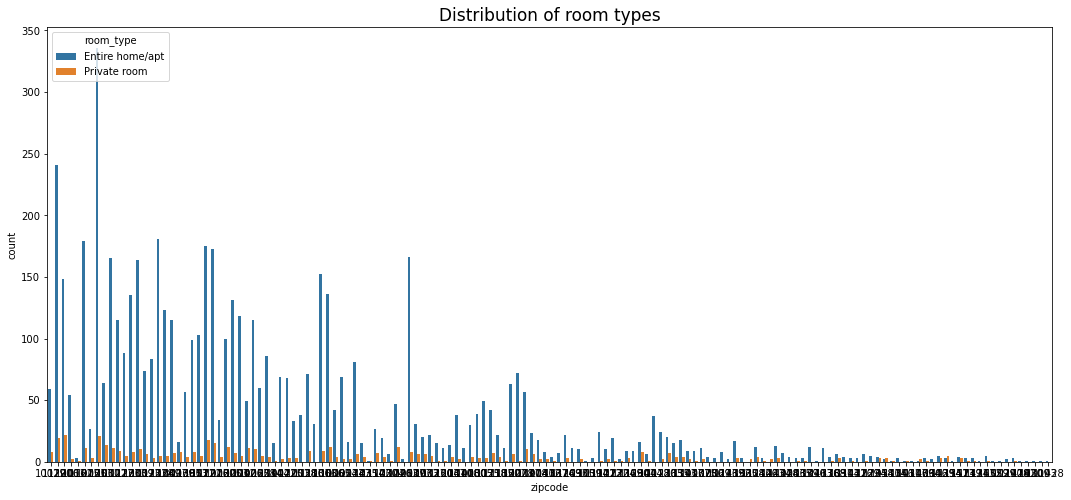

In [41]:
# plotting the distribution of room types

plt.figure(figsize=(18,8))
plt.title("Distribution of room types", fontsize = 17)
sns.countplot(x= 'zipcode', hue = 'room_type', data= airbnb )

#### Insight:
In the graph above,blue lines shows the Entire home/apt and orange line shows the private rooms. we can see that number of entire home/apt rented are way more than private room rented in that particular zipcode.

In [42]:
# filtering entire home/apt

airbnb = airbnb[airbnb['room_type'] == 'Entire home/apt']

In [43]:
# last date when the data was updated in AIRBNB

unique_values('last_scraped')

['2019-07-08', '2019-07-09']

In [44]:
# zillow dataset last date = 2017-06

#### Therefore, the common date to be consider for further analysis would be till 2017-06.
#### For cost, since the price of today will remain same till next 100 years, therefore, it is relevant to consider only present/latest date (2017-06)

In [45]:
# required columns and 
zillow_columns = ['RegionName','City','CountyName','2017-06']
zillow_NY = zillow_NY[zillow_columns]

# rename the 2017-06 to COST
zillow_NY['cost'] = zillow_NY['2017-06']
zillow_NY.head()

,RegionName,City,CountyName,2017-06,cost
0,10025,New York,Manhattan,1431000,1431000
2,10023,New York,Manhattan,2142300,2142300
13,10128,New York,Manhattan,1787100,1787100
14,10011,New York,Manhattan,2480400,2480400
20,10003,New York,Manhattan,2147000,2147000


In [46]:
# merge AIRBNB and ZILLOW data

df = pd.merge(left = airbnb, right = zillow_NY, how='inner', left_on = 'zipcode', right_on= 'RegionName')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,RegionName,City,CountyName,2017-06,cost
0,16458,https://www.airbnb.com/rooms/16458,20190708031610,2019-07-08,Light-filled 2B duplex in the heart of Park Sl...,"Located in the heart of Park Slope, a safe, fa...",Our place is a relaxed and quiet refuge from t...,"Located in the heart of Park Slope, a safe, fa...",none,"We are in the heart of Park Slope, a truly bea...",...,1,1,0,0,0.16,11215,New York,Brooklyn,1070800,1070800
1,27659,https://www.airbnb.com/rooms/27659,20190708031610,2019-07-08,3 Story Town House in Park Slope,NaN,"Spacious 3000 sq ft triplex with backyard, ren...","Spacious 3000 sq ft triplex with backyard, ren...",none,NaN,...,2,2,0,0,0.24,11215,New York,Brooklyn,1070800,1070800
2,41348,https://www.airbnb.com/rooms/41348,20190708031610,2019-07-09,* Spacious GARDEN Park Slope Duplex* 6 people max,Nice and comfy duplex (sleeps 6 max) in a nice...,Appx 1300 SF (120 SqMt) garden & parlor floor ...,Nice and comfy duplex (sleeps 6 max) in a nice...,none,Great for families and friends. Close to bouti...,...,1,1,0,0,2.17,11215,New York,Brooklyn,1070800,1070800
3,76761,https://www.airbnb.com/rooms/76761,20190708031610,2019-07-09,Eveland the Place to Stay & Enjoy a 5-⭐️ 2bdrm,An extensive renovation was just done a new ki...,"Bright, comfortable and totally private two be...",An extensive renovation was just done a new ki...,none,Park Slope is considered one of New York City'...,...,3,2,1,0,3.97,11215,New York,Brooklyn,1070800,1070800
4,121861,https://www.airbnb.com/rooms/121861,20190708031610,2019-07-09,"Park Slope Apt:, Spacious 2 bedroom",NaN,"Imagine a quiet, spacious apartment, with beau...","Imagine a quiet, spacious apartment, with beau...",none,NaN,...,2,1,1,0,0.23,11215,New York,Brooklyn,1070800,1070800


In [47]:
# unique no.of zipcodes in the final dataframe

df['zipcode'].nunique()

23

In [48]:
# getting the count of 2 bedroom properties per zipcode; creating new dataframe for it
df_1 = df.groupby(['zipcode']).bedrooms.agg('count').reset_index(name='Number of two bedrooms')
print(df_1)

# zipcodes with the count of 2 bedrooms < 10 
low_zip = df_1[df_1['Number of two bedrooms'] < 10]
low_zip

   zipcode  Number of two bedrooms
0    10003                     131
1    10011                     103
2    10013                      99
3    10014                      86
4    10021                      22
5    10022                      69
6    10023                      74
7    10025                     115
8    10028                      72
9    10036                     136
10   10128                      60
11   10303                       4
12   10304                       3
13   10305                      10
14   10306                       2
15   10309                       1
16   10314                       1
17   11201                      83
18   11215                     179
19   11217                     115
20   11231                      88
21   11234                       9
22   11434                      13


,zipcode,Number of two bedrooms
11,10303,4
12,10304,3
14,10306,2
15,10309,1
16,10314,1
21,11234,9


<AxesSubplot:title={'center':'Zipcodes with the count of 2 bedrooms less than 10 '}, xlabel='zipcode', ylabel='Number of two bedrooms'>

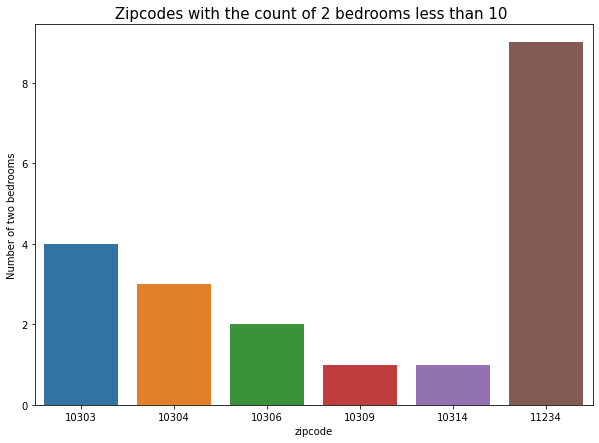

In [49]:
# lowest zipcodes with less than 10 number of 2 bedrooms

plt.figure(figsize=(10,7))
plt.title("Zipcodes with the count of 2 bedrooms less than 10 ", fontsize = 15)
sns.barplot(x= low_zip['zipcode'], y= low_zip['Number of two bedrooms'])

#### Insight:
From the graph above, these zipcodes have count of 2 bedrooms less than 10 and hence won't be best zipcodes to invest in. As we can see from the zipcodes that majority of these zipcodes are in Staten Island. So, zipcodes 10303, 10304, 10306, 10309, 10314 are not worth investing in according to the count of 2 bedrooms.

In [50]:
# top 10 zipcodes with highest number of 2 bedrooms

top_10 = df_1.sort_values('Number of two bedrooms', ascending=False).head(10)
top_10

,zipcode,Number of two bedrooms
18,11215,179
9,10036,136
0,10003,131
7,10025,115
19,11217,115
1,10011,103
2,10013,99
20,11231,88
3,10014,86
17,11201,83


<AxesSubplot:title={'center':'Top 10 zipcodes with most number of 2 bedrooms'}, xlabel='zipcode', ylabel='Number of two bedrooms'>

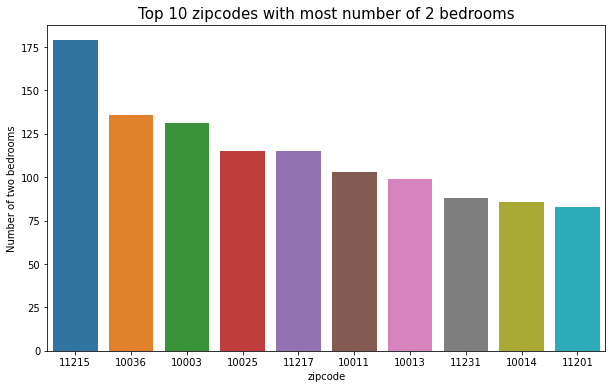

In [51]:
# top 10 zipcodes with most 2 bedroom

plt.figure(figsize=(10,6))
plt.title("Top 10 zipcodes with most number of 2 bedrooms", fontsize = 15)
sns.barplot(x= top_10['zipcode'], y= top_10['Number of two bedrooms'], order=top_10['zipcode'])

#### Insight:
From the graph above, these zipcodes have most number of 2 bedrooms and hence would be the best zipcodes to invest in and that makes them more attractive on AirBnB listings. zipcodes 11215, 10036, 10003 are the top 3 zipcodes with most listings. All these top 10 listings are either in Manhattan or Brooklyn.

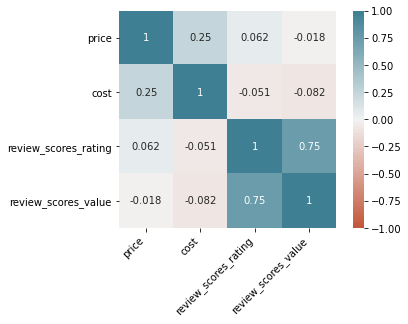

In [52]:
# create a new dataframe to find correlation between columns which might help in analysis
dff = df[['price','cost','review_scores_rating','review_scores_value']]

corr = dff.corr()
# corr[np.abs(corr)<.2] = 0

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Insight:
From the correlation plot above, price and cost have a weak positive correlation whereas review_score_value and review_score_rating has the strong positive correlation of 0.75.

## OCCUPANCY RATE 

In [53]:
# default occupany rate(OR) = 0.75
# Calculating own OR

# required columns for calculating OR
# there could be newly built properties for less than an year available for renting
occupancy = df[['zipcode','availability_30','availability_60','availability_90','availability_365']]

# median number of days the property is available for rent per zipcode
occup_mday = occupancy.groupby('zipcode').median().reset_index()

In [54]:
occup_mday

,zipcode,availability_30,availability_60,availability_90,availability_365
0,10003,0.0,5.0,13.0,36.0
1,10011,0.0,3.0,10.0,29.0
2,10013,3.0,11.0,20.0,41.0
3,10014,0.0,2.0,3.0,14.0
4,10021,0.5,5.0,6.0,38.0
5,10022,3.0,27.0,52.0,281.0
6,10023,0.0,8.0,16.0,160.5
7,10025,0.0,0.0,1.0,8.0
8,10028,0.0,20.0,44.0,215.0
9,10036,4.0,15.5,26.0,183.0


In [55]:
# normalizing each column to use for calculating OR

occup_mday['normalized_30'] = occup_mday['availability_30']/30
occup_mday['normalized_60'] = occup_mday['availability_60']/60
occup_mday['normalized_90'] = occup_mday['availability_90']/90
occup_mday['normalized_365'] = occup_mday['availability_365']/365
occup_mday['normalized_mean'] = (occup_mday.normalized_30+occup_mday.normalized_60+occup_mday.normalized_90+2*occup_mday.normalized_365)/5

# calculating OR
occup_mday['occupancy_rate'] = 1 - occup_mday['normalized_mean']
occup_mday

,zipcode,availability_30,availability_60,availability_90,availability_365,normalized_30,normalized_60,normalized_90,normalized_365,normalized_mean,occupancy_rate
0,10003,0.0,5.0,13.0,36.0,0.000000,0.083333,0.144444,0.098630,0.085008,0.914992
1,10011,0.0,3.0,10.0,29.0,0.000000,0.050000,0.111111,0.079452,0.064003,0.935997
2,10013,3.0,11.0,20.0,41.0,0.100000,0.183333,0.222222,0.112329,0.146043,0.853957
3,10014,0.0,2.0,3.0,14.0,0.000000,0.033333,0.033333,0.038356,0.028676,0.971324
4,10021,0.5,5.0,6.0,38.0,0.016667,0.083333,0.066667,0.104110,0.074977,0.925023
5,10022,3.0,27.0,52.0,281.0,0.100000,0.450000,0.577778,0.769863,0.533501,0.466499
6,10023,0.0,8.0,16.0,160.5,0.000000,0.133333,0.177778,0.439726,0.238113,0.761887
7,10025,0.0,0.0,1.0,8.0,0.000000,0.000000,0.011111,0.021918,0.010989,0.989011
8,10028,0.0,20.0,44.0,215.0,0.000000,0.333333,0.488889,0.589041,0.400061,0.599939
9,10036,4.0,15.5,26.0,183.0,0.133333,0.258333,0.288889,0.501370,0.336659,0.663341


In [56]:
# categorizing OR into 5 levels for simplfying calculation

occup_mday.occupancy_rate[occup_mday.occupancy_rate > 0.8] = 0.9
occup_mday.occupancy_rate[(occup_mday.occupancy_rate > 0.6) & (occup_mday.occupancy_rate < 0.8)] = 0.7
occup_mday.occupancy_rate[(occup_mday.occupancy_rate > 0.4) & (occup_mday.occupancy_rate < 0.6)] = 0.5
occup_mday.occupancy_rate[(occup_mday.occupancy_rate > 0.2) & (occup_mday.occupancy_rate < 0.4)] = 0.3
occup_mday.occupancy_rate[occup_mday.occupancy_rate < 0.2] = 0.1

<ipython-input-56-9c5b2d11e1ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occup_mday.occupancy_rate[occup_mday.occupancy_rate > 0.8] = 0.9
<ipython-input-56-9c5b2d11e1ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occup_mday.occupancy_rate[(occup_mday.occupancy_rate > 0.6) & (occup_mday.occupancy_rate < 0.8)] = 0.7
<ipython-input-56-9c5b2d11e1ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occup_mday.occupancy_rate[(o

In [57]:
# grouping by zipcode and neighbourhood_group_cleansed to get the price and cost
new_grp = df[['zipcode','price','cost','neighbourhood_group_cleansed']].groupby(['zipcode','neighbourhood_group_cleansed']).median().reset_index()

# joining/merging occup_mday and new_grp and putting a suffix 1 on zipcode 
#for identification of two zipcode columns

dx = pd.merge(occup_mday, new_grp, how = 'inner', on = 'zipcode')
dx.drop(dx.columns[1:10], axis = 1, inplace =  True)

dx

,zipcode,occupancy_rate,neighbourhood_group_cleansed,price,cost
0,10003,0.9,Manhattan,250.0,2147000
1,10011,0.9,Manhattan,325.0,2480400
2,10013,0.9,Manhattan,350.0,3316500
3,10014,0.9,Manhattan,299.0,2491600
4,10021,0.9,Manhattan,250.0,1815600
5,10022,0.5,Manhattan,300.0,2031600
6,10023,0.7,Manhattan,275.0,2142300
7,10025,0.9,Manhattan,234.0,1431000
8,10028,0.5,Manhattan,247.0,2083900
9,10036,0.7,Manhattan,350.0,1712900


<AxesSubplot:title={'center':'Price for zipcodes per Night'}, xlabel='zipcode', ylabel='price'>

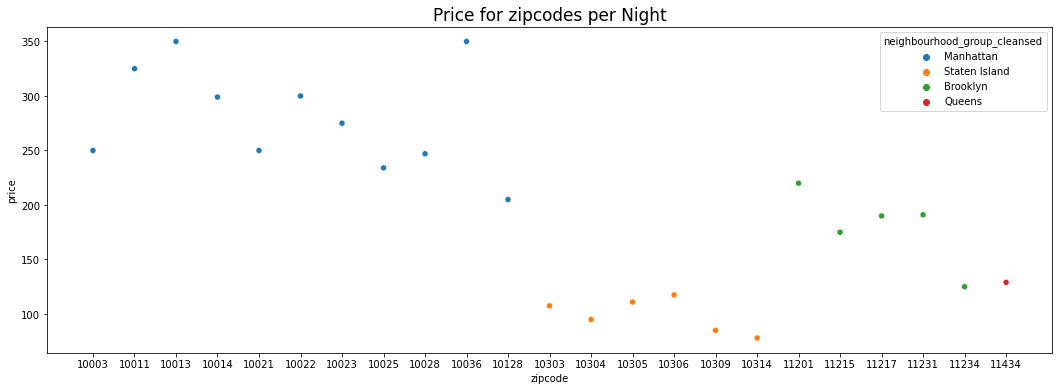

In [58]:
# scatterplot of price as per zipcode in different neighbourhood_group_cleansed

plt.figure(figsize=(18,6))
plt.title("Price for zipcodes per Night", fontsize = 17)
sns.scatterplot(x= 'zipcode', y= 'price', hue= 'neighbourhood_group_cleansed', data= dx)

#### Insight:
From the graph above, we can see that zipcodes 10011, 10013, 10036 are having most of the properties where price of stay per night is high. These zipcodes are located in Manhattan making it an expensive neighbourhood group.

<AxesSubplot:title={'center':'Purchase cost of properties for zipcodes'}, xlabel='zipcode', ylabel='cost'>

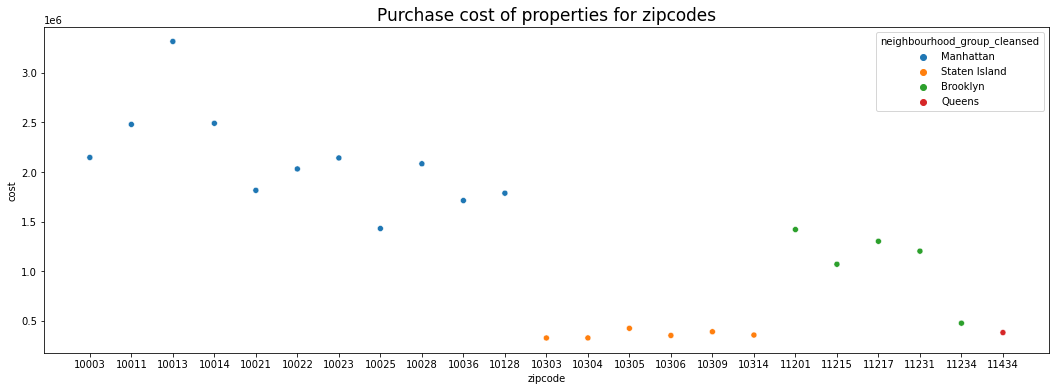

In [59]:
# scatterplot of purchasing cost of properties for different zipcodes as per neighbourhood_group_cleansed

plt.figure(figsize=(18,6))
plt.title("Purchase cost of properties for zipcodes", fontsize = 17)
sns.scatterplot(x= 'zipcode', y= 'cost', hue= 'neighbourhood_group_cleansed', data= dx)

#### Insight:
From the graph above, we can see that zipcodes 10011, 10013, 10014 are having most of the properties where purchasing cost is high. These zipcodes are located in Manhattan making it costlier to buy properties there whereas zipcodes in Staten Island have low purchase cost.

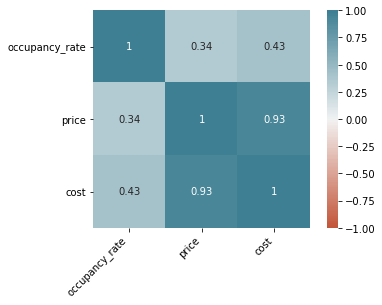

In [60]:
# correlation between the variables

corr = dx.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Insight:
From the correlation plot above, price and cost have a very strong positive correlation of 0.93. This shows that the real estate company would get costlier rent from the neighbourhood group which has highest purchasing cost. These two variables have a linear relationship. Manhattan and Brooklyn can be the most desirable neighbourhood groups according to this relationship.

### Calculating for self determined occupancy rate

In [61]:
# calculating expected revenue on an yearly basis
# Expected Revenue = price * no of days * OR

dx['expt_revenue'] = dx.price*365*dx.occupancy_rate
dx = dx.sort_values(['zipcode']).reset_index(drop=True)
dx

,zipcode,occupancy_rate,neighbourhood_group_cleansed,price,cost,expt_revenue
0,10003,0.9,Manhattan,250.0,2147000,82125.00
1,10011,0.9,Manhattan,325.0,2480400,106762.50
2,10013,0.9,Manhattan,350.0,3316500,114975.00
3,10014,0.9,Manhattan,299.0,2491600,98221.50
4,10021,0.9,Manhattan,250.0,1815600,82125.00
5,10022,0.5,Manhattan,300.0,2031600,54750.00
6,10023,0.7,Manhattan,275.0,2142300,70262.50
7,10025,0.9,Manhattan,234.0,1431000,76869.00
8,10028,0.5,Manhattan,247.0,2083900,45077.50
9,10036,0.7,Manhattan,350.0,1712900,89425.00


In [62]:
# creating new dataframe with values sorted by order for expected revenue

highest_revenue = dx.sort_values('expt_revenue', ascending=False)
highest_revenue

,zipcode,occupancy_rate,neighbourhood_group_cleansed,price,cost,expt_revenue
2,10013,0.9,Manhattan,350.0,3316500,114975.00
1,10011,0.9,Manhattan,325.0,2480400,106762.50
3,10014,0.9,Manhattan,299.0,2491600,98221.50
9,10036,0.7,Manhattan,350.0,1712900,89425.00
0,10003,0.9,Manhattan,250.0,2147000,82125.00
4,10021,0.9,Manhattan,250.0,1815600,82125.00
7,10025,0.9,Manhattan,234.0,1431000,76869.00
17,11201,0.9,Brooklyn,220.0,1420700,72270.00
6,10023,0.7,Manhattan,275.0,2142300,70262.50
10,10128,0.9,Manhattan,205.0,1787100,67342.50


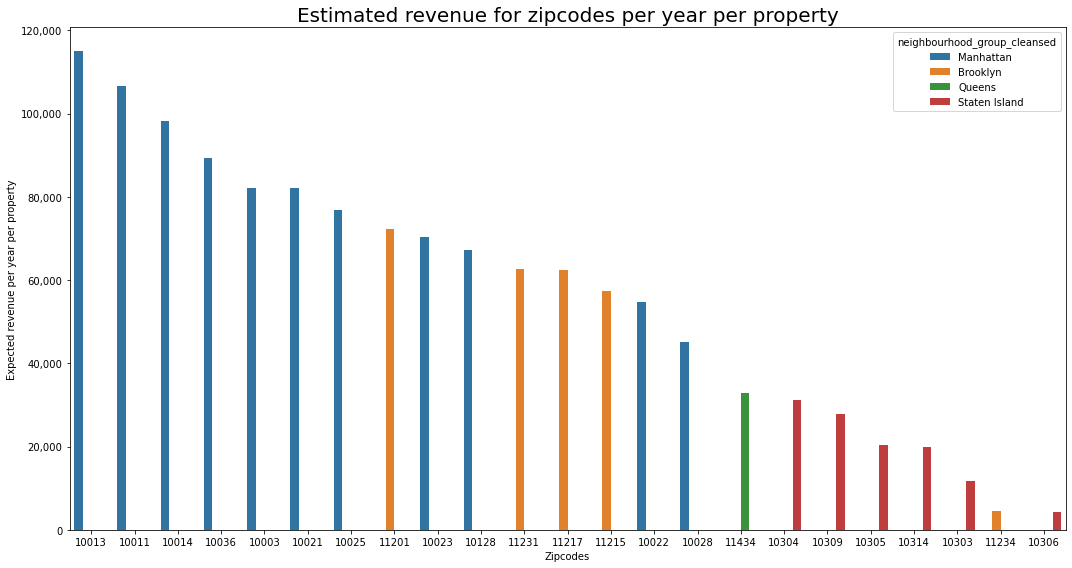

In [63]:
# plot for estimated revenue for zipcodes per year per property

plt.figure(figsize=(15,8))
plt.title("Estimated revenue for zipcodes per year per property", fontsize= 20)
ax = sns.barplot(x=highest_revenue["zipcode"], y=highest_revenue["expt_revenue"], hue= highest_revenue['neighbourhood_group_cleansed'], order= highest_revenue['zipcode'])
ax.set(xlabel='Zipcodes', ylabel='Expected revenue per year per property')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# add proper Dimension values as x labels
ax.set_xticklabels(highest_revenue.zipcode)
plt.tight_layout()
plt.show()

#### Insight:
From the above graph, we can see the zipcodes 10011, 10013, 10014 are having highest expected revenue. These zipcodes lies in Manhattan neighbourhood group. These zipcodes with higher value of expected revenue can have good profit and better return on investment but they are also having higher purchasing cost. These 3 zipcodes can be a good choice to invest in based on estimated revenue only.

In [64]:
# calculating return on cost(ROC)
# ROC = Expected Revenue/ Current_Value

dx['ROC'] = dx.expt_revenue/dx.cost

In [65]:
# creating new dataframe with values for ROC added and sorted by order for expected revenue

highest_revenue = dx.sort_values('expt_revenue', ascending=False)
highest_revenue

,zipcode,occupancy_rate,neighbourhood_group_cleansed,price,cost,expt_revenue,ROC
2,10013,0.9,Manhattan,350.0,3316500,114975.00,0.034668
1,10011,0.9,Manhattan,325.0,2480400,106762.50,0.043042
3,10014,0.9,Manhattan,299.0,2491600,98221.50,0.039421
9,10036,0.7,Manhattan,350.0,1712900,89425.00,0.052207
0,10003,0.9,Manhattan,250.0,2147000,82125.00,0.038251
4,10021,0.9,Manhattan,250.0,1815600,82125.00,0.045233
7,10025,0.9,Manhattan,234.0,1431000,76869.00,0.053717
17,11201,0.9,Brooklyn,220.0,1420700,72270.00,0.050869
6,10023,0.7,Manhattan,275.0,2142300,70262.50,0.032798
10,10128,0.9,Manhattan,205.0,1787100,67342.50,0.037683


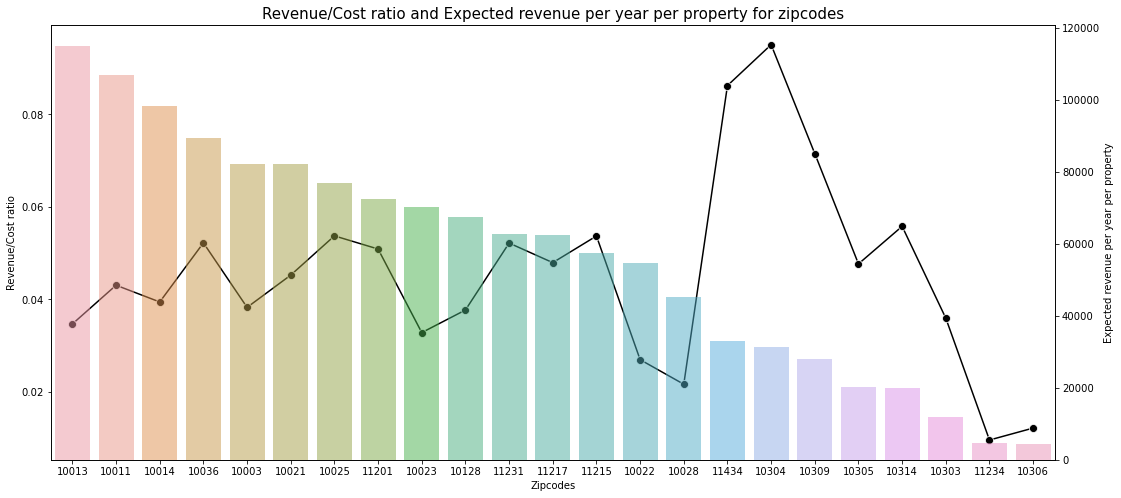

In [66]:
# barplot for expected revenue per year with lineplot of ROC sorted by order of expected revenue
# the left y-axis = revenue/cost ratio and the right y-axis = expected revenue per year per property.

fig, ax = plt.subplots(figsize=(18,8))

g = sns.lineplot(x='zipcode',  y='ROC', data=highest_revenue, ax=ax, sort =False, marker='o', markersize=8, color ='k')
ax2 = ax.twinx()
g = sns.barplot(x=highest_revenue["zipcode"], y=highest_revenue["expt_revenue"], data =highest_revenue, order= highest_revenue['zipcode'], ax=ax2, alpha=.5)


ax2.set(xlabel='Zipcodes', ylabel='Expected revenue per year per property')
ax.set(xlabel='Zipcodes', ylabel='Revenue/Cost ratio')

ax.set_title('Revenue/Cost ratio and Expected revenue per year per property for zipcodes', fontsize = 15)
plt.show()

#### Insight:
The left y-axis depicts return on cost and the right y-axis depicts expected revenue per property per year. This graph would help the real estate company understand when they would have a breakeven on a purchase across different zipcodes. A high return on cost means the zipcode would be safer because the investment would break even sooner than similar 2 bedroom investments in zipcodes having low return on cost. The zipcodes like 11434, 10304, 10309 have highest return on cost because the purchasing cost is lower than other zipcodes. These properties are located in Queens and Staten Island.

#### For determining zipcodes based on their profitability, we need to calculate breakeven period for properties in zipcodes. It is often calculated as number of year that property is taking to overcome purchasing cost for the same property. 

In [67]:
# calculating breakeven period(BP)
# BP = 1/ ReturnOnCost

dx['BP'] = 1/dx.ROC

In [68]:
# creating new dataframe with values sorted by BP

highest_revenue = dx.sort_values('BP')
highest_revenue

,zipcode,occupancy_rate,neighbourhood_group_cleansed,price,cost,expt_revenue,ROC,BP
12,10304,0.9,Staten Island,95.0,328300,31207.50,0.095058,10.519907
22,11434,0.7,Queens,129.0,382300,32959.50,0.086214,11.599084
15,10309,0.9,Staten Island,85.0,390500,27922.50,0.071504,13.985137
16,10314,0.7,Staten Island,78.0,357300,19929.00,0.055777,17.928647
7,10025,0.9,Manhattan,234.0,1431000,76869.00,0.053717,18.616087
18,11215,0.9,Brooklyn,175.0,1070800,57487.50,0.053686,18.626658
9,10036,0.7,Manhattan,350.0,1712900,89425.00,0.052207,19.154599
20,11231,0.9,Brooklyn,191.0,1202900,62743.50,0.052160,19.171707
17,11201,0.9,Brooklyn,220.0,1420700,72270.00,0.050869,19.658226
19,11217,0.9,Brooklyn,190.0,1302300,62415.00,0.047927,20.865177


<AxesSubplot:title={'center':'Average BP(in years) for properties in each zipcode'}, xlabel='zipcode', ylabel='BP'>

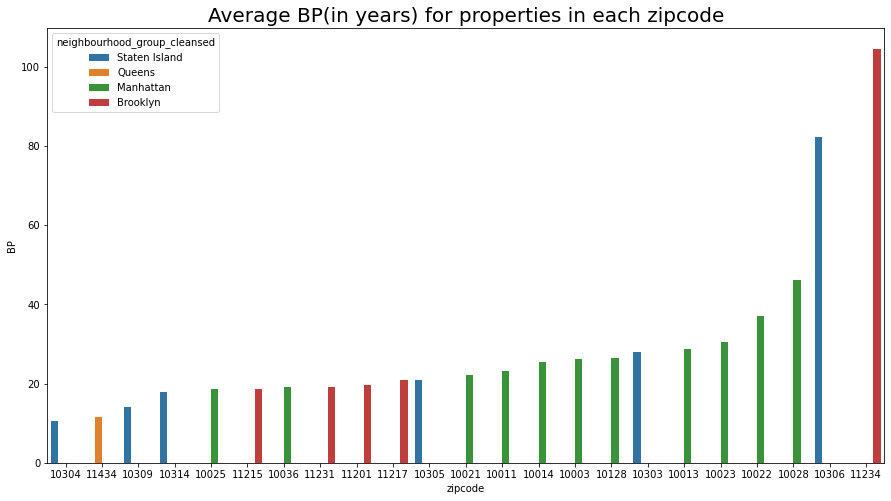

In [69]:
# plotting average BP( in years) for properties in each zipcode

plt.figure(figsize=(15,8))
plt.title("Average BP(in years) for properties in each zipcode", fontsize= 20)
sns.barplot(x= highest_revenue['zipcode'], y= highest_revenue['BP'], hue = highest_revenue['neighbourhood_group_cleansed'], order= highest_revenue['zipcode'], data = highest_revenue)

#### Insight:
From the graph above, we can see that zipcodes 10304, 10309 and other Staten Island properties have low breakeven period. This is because they have low purchasing cost of property. Although, the revenue generated from zipcodes 10011, 10013, 10014 etc is very high , but the breakeven period is also very high because they have high purchasing cost. These zipcodes are located in Manhattan neighbourhood. Looking at the breakeven period, we can say that these zipcodes would not generate more profit.

In [70]:
# final dataframe with self calculated OR
highest_revenue

,zipcode,occupancy_rate,neighbourhood_group_cleansed,price,cost,expt_revenue,ROC,BP
12,10304,0.9,Staten Island,95.0,328300,31207.50,0.095058,10.519907
22,11434,0.7,Queens,129.0,382300,32959.50,0.086214,11.599084
15,10309,0.9,Staten Island,85.0,390500,27922.50,0.071504,13.985137
16,10314,0.7,Staten Island,78.0,357300,19929.00,0.055777,17.928647
7,10025,0.9,Manhattan,234.0,1431000,76869.00,0.053717,18.616087
18,11215,0.9,Brooklyn,175.0,1070800,57487.50,0.053686,18.626658
9,10036,0.7,Manhattan,350.0,1712900,89425.00,0.052207,19.154599
20,11231,0.9,Brooklyn,191.0,1202900,62743.50,0.052160,19.171707
17,11201,0.9,Brooklyn,220.0,1420700,72270.00,0.050869,19.658226
19,11217,0.9,Brooklyn,190.0,1302300,62415.00,0.047927,20.865177


#### Assuming occupancy rate = 75% for all the properties as per given assumptions.

In [71]:
# making a copy of dx dataframe for further calculations with occupancy rate of 75% 

dx_2 = dx.copy()
dx_2['occupancy_rate'] = 0.75 

In [72]:
# calculating expected revenue on an yearly basis
# Expected Revenue = price * no of days * OR

dx_2['expt_revenue'] = dx_2.price*365*dx_2.occupancy_rate

In [73]:
# creating new dataframe with values sorted by order for expected revenue

highest_revenue_2 = dx_2.sort_values('expt_revenue', ascending=False)
highest_revenue_2

,zipcode,occupancy_rate,neighbourhood_group_cleansed,price,cost,expt_revenue,ROC,BP
2,10013,0.75,Manhattan,350.0,3316500,95812.500,0.034668,28.845401
9,10036,0.75,Manhattan,350.0,1712900,95812.500,0.052207,19.154599
1,10011,0.75,Manhattan,325.0,2480400,88968.750,0.043042,23.232877
5,10022,0.75,Manhattan,300.0,2031600,82125.000,0.026949,37.106849
3,10014,0.75,Manhattan,299.0,2491600,81851.250,0.039421,25.367155
6,10023,0.75,Manhattan,275.0,2142300,75281.250,0.032798,30.489948
0,10003,0.75,Manhattan,250.0,2147000,68437.500,0.038251,26.143075
4,10021,0.75,Manhattan,250.0,1815600,68437.500,0.045233,22.107763
8,10028,0.75,Manhattan,247.0,2083900,67616.250,0.021631,46.229272
7,10025,0.75,Manhattan,234.0,1431000,64057.500,0.053717,18.616087


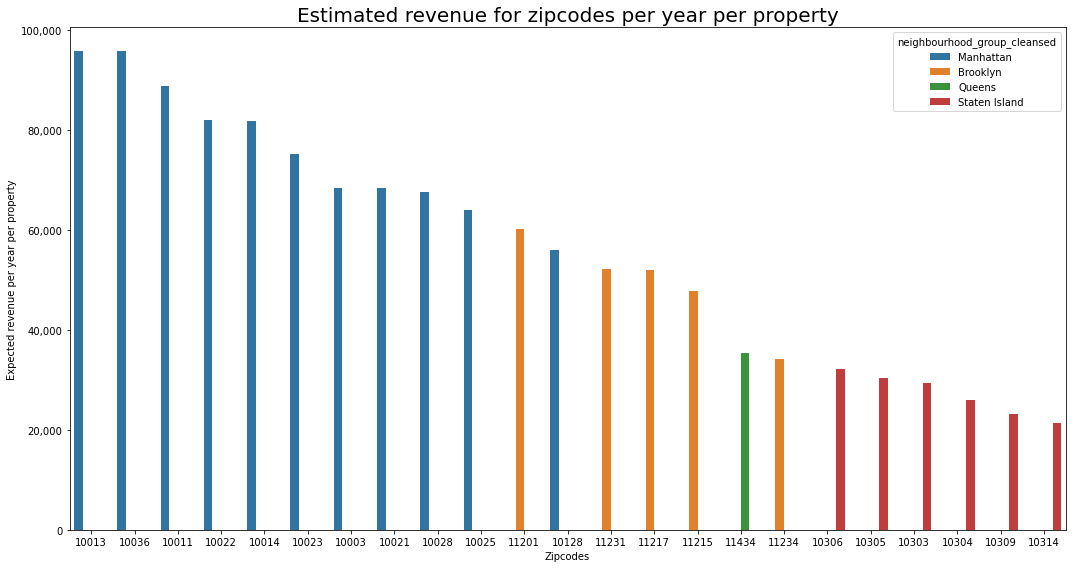

In [74]:
# plot for estimated revenue for zipcodes per year per property

plt.figure(figsize=(15,8))
plt.title("Estimated revenue for zipcodes per year per property", fontsize= 20)
ax = sns.barplot(x=highest_revenue_2["zipcode"], y=highest_revenue_2["expt_revenue"], hue= highest_revenue_2['neighbourhood_group_cleansed'], order= highest_revenue_2['zipcode'])
ax.set(xlabel='Zipcodes', ylabel='Expected revenue per year per property')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# add proper Dim values as x labels
ax.set_xticklabels(highest_revenue_2.zipcode)
plt.tight_layout()
plt.show()

#### Insight:
From the above graph, we can see the zipcodes 10011, 10013, 10014 are having highest expected revenue. These zipcodes lies in Manhattan neighbourhood group. These zipcodes with higher value of expected revenue can have good profit and better return on investment but they are also having higher purchasing cost. These 3 zipcodes can be a good choice to invest in based on estimated revenue only.

In [75]:
# calculating ROC

dx_2['ROC'] = dx_2.expt_revenue/dx_2.cost

In [76]:
# creating new dataframe with values for ROC added and sorted by order for expected revenue

highest_revenue_2 = dx_2.sort_values('expt_revenue', ascending=False)
highest_revenue_2

,zipcode,occupancy_rate,neighbourhood_group_cleansed,price,cost,expt_revenue,ROC,BP
2,10013,0.75,Manhattan,350.0,3316500,95812.500,0.028890,28.845401
9,10036,0.75,Manhattan,350.0,1712900,95812.500,0.055936,19.154599
1,10011,0.75,Manhattan,325.0,2480400,88968.750,0.035869,23.232877
5,10022,0.75,Manhattan,300.0,2031600,82125.000,0.040424,37.106849
3,10014,0.75,Manhattan,299.0,2491600,81851.250,0.032851,25.367155
6,10023,0.75,Manhattan,275.0,2142300,75281.250,0.035140,30.489948
0,10003,0.75,Manhattan,250.0,2147000,68437.500,0.031876,26.143075
4,10021,0.75,Manhattan,250.0,1815600,68437.500,0.037694,22.107763
8,10028,0.75,Manhattan,247.0,2083900,67616.250,0.032447,46.229272
7,10025,0.75,Manhattan,234.0,1431000,64057.500,0.044764,18.616087


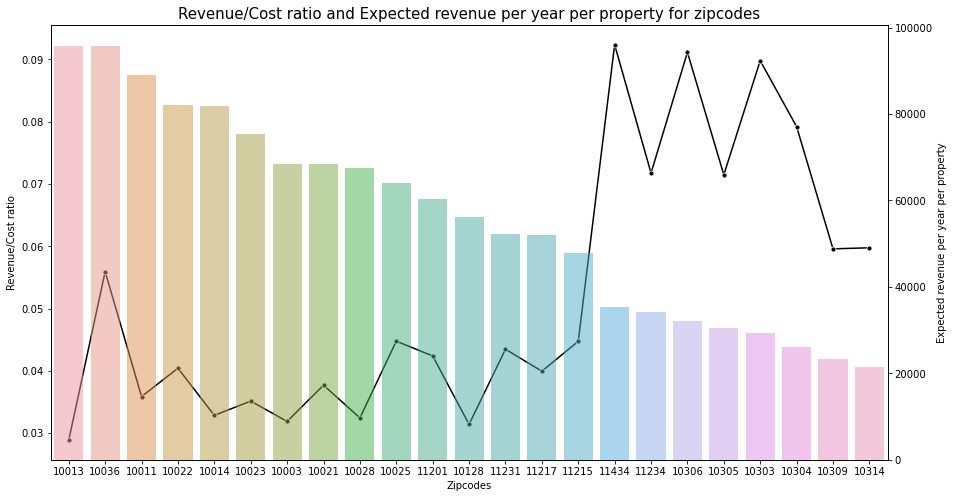

In [77]:
# barplot for expected revenue per year with lineplot of ROC sorted by order of expected revenue

fig, ax = plt.subplots(figsize=(15,8))

g = sns.lineplot(x='zipcode',  y='ROC', data=highest_revenue_2, ax=ax, sort =False, marker='o', markersize=5 , color = 'k')
ax2 = ax.twinx()
g = sns.barplot(x=highest_revenue_2["zipcode"], y=highest_revenue_2["expt_revenue"], data =highest_revenue_2, order= highest_revenue_2['zipcode'], ax=ax2, alpha=.5)

ax2.set(xlabel='Zipcodes', ylabel='Expected revenue per year per property')
ax.set(xlabel='Zipcodes', ylabel='Revenue/Cost ratio')

ax.set_title('Revenue/Cost ratio and Expected revenue per year per property for zipcodes', fontsize = 15)
plt.show()

#### Insight:
The left y-axis depicts return on cost and the right y-axis depicts expected revenue per property per year. This graph would help the real estate company understand when they would have a breakeven on a purchase across different zipcodes. A high return on cost means the zipcode would be safer because the investment would break even sooner than similar 2 bedroom investments in zipcodes having low return on cost. The zipcodes like 11434, 10303, 10306 have highest return on cost because the purchasing cost is lower than other zipcodes. These properties are located in Queens and Staten Island. The zipcodes like 10013, 10014, 10011 have low return on cost because the expected revenue and purchasing cost both are high than other zipcodes. These zipcodes are located in Manhattan neighbourhood group.

In [78]:
# calculating BP

dx_2['BP'] = 1/dx_2.ROC

In [79]:
# creating new dataframe with values sorted by BP

highest_revenue_2 = dx_2.sort_values('BP')
highest_revenue_2

,zipcode,occupancy_rate,neighbourhood_group_cleansed,price,cost,expt_revenue,ROC,BP
22,11434,0.75,Queens,129.0,382300,35313.750,0.092372,10.825811
14,10306,0.75,Staten Island,117.5,352900,32165.625,0.091147,10.971340
11,10303,0.75,Staten Island,107.5,327700,29428.125,0.089802,11.135606
12,10304,0.75,Staten Island,95.0,328300,26006.250,0.079215,12.623888
21,11234,0.75,Brooklyn,125.0,476900,34218.750,0.071752,13.936804
13,10305,0.75,Staten Island,111.0,425100,30386.250,0.071480,13.989880
16,10314,0.75,Staten Island,78.0,357300,21352.500,0.059761,16.733404
15,10309,0.75,Staten Island,85.0,390500,23268.750,0.059587,16.782165
9,10036,0.75,Manhattan,350.0,1712900,95812.500,0.055936,17.877626
7,10025,0.75,Manhattan,234.0,1431000,64057.500,0.044764,22.339305


<AxesSubplot:title={'center':'Average BP(in years) for properties in each zipcode'}, xlabel='zipcode', ylabel='BP'>

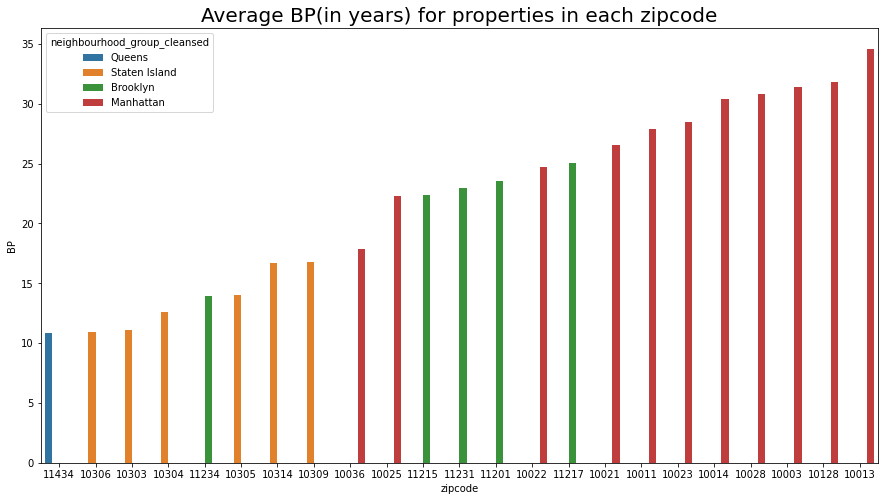

In [80]:
# plotting average BP( in years) for properties in each zipcode

plt.figure(figsize=(15,8))
plt.title("Average BP(in years) for properties in each zipcode", fontsize= 20)
sns.barplot(x= highest_revenue_2['zipcode'], y= highest_revenue_2['BP'], hue = highest_revenue_2['neighbourhood_group_cleansed'], order= highest_revenue_2['zipcode'], data = highest_revenue_2)

#### Insight:
From the graph above, we can see that zipcodes 10304, 10309 and other Staten Island properties have low breakeven period. This is because they have low purchasing cost of property and also occupancy rate is considered as 75%. Although, the revenue generated from zipcodes 10011, 10013, 10014 etc is very high , but the breakeven period is also very high because they have high purchasing cost. These zipcodes are located in Manhattan neighbourhood. Looking at the breakeven period, we can say that these zipcodes would not generate more profit. 

In [81]:
# final dataframe with 75% occupancy rate 
highest_revenue_2

,zipcode,occupancy_rate,neighbourhood_group_cleansed,price,cost,expt_revenue,ROC,BP
22,11434,0.75,Queens,129.0,382300,35313.750,0.092372,10.825811
14,10306,0.75,Staten Island,117.5,352900,32165.625,0.091147,10.971340
11,10303,0.75,Staten Island,107.5,327700,29428.125,0.089802,11.135606
12,10304,0.75,Staten Island,95.0,328300,26006.250,0.079215,12.623888
21,11234,0.75,Brooklyn,125.0,476900,34218.750,0.071752,13.936804
13,10305,0.75,Staten Island,111.0,425100,30386.250,0.071480,13.989880
16,10314,0.75,Staten Island,78.0,357300,21352.500,0.059761,16.733404
15,10309,0.75,Staten Island,85.0,390500,23268.750,0.059587,16.782165
9,10036,0.75,Manhattan,350.0,1712900,95812.500,0.055936,17.877626
7,10025,0.75,Manhattan,234.0,1431000,64057.500,0.044764,22.339305
